In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('TSLA.csv')

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
5,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
6,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000
7,2010-07-09,3.516,3.580,3.310,3.480,3.480,20253000
8,2010-07-12,3.590,3.614,3.400,3.410,3.410,11012500
9,2010-07-13,3.478,3.728,3.380,3.628,3.628,13400500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [5]:
import datetime as dt

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.set_index(df['Date'],inplace=True)

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-06-29,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [10]:
df.drop(columns=['Date'],axis=1,inplace=True)

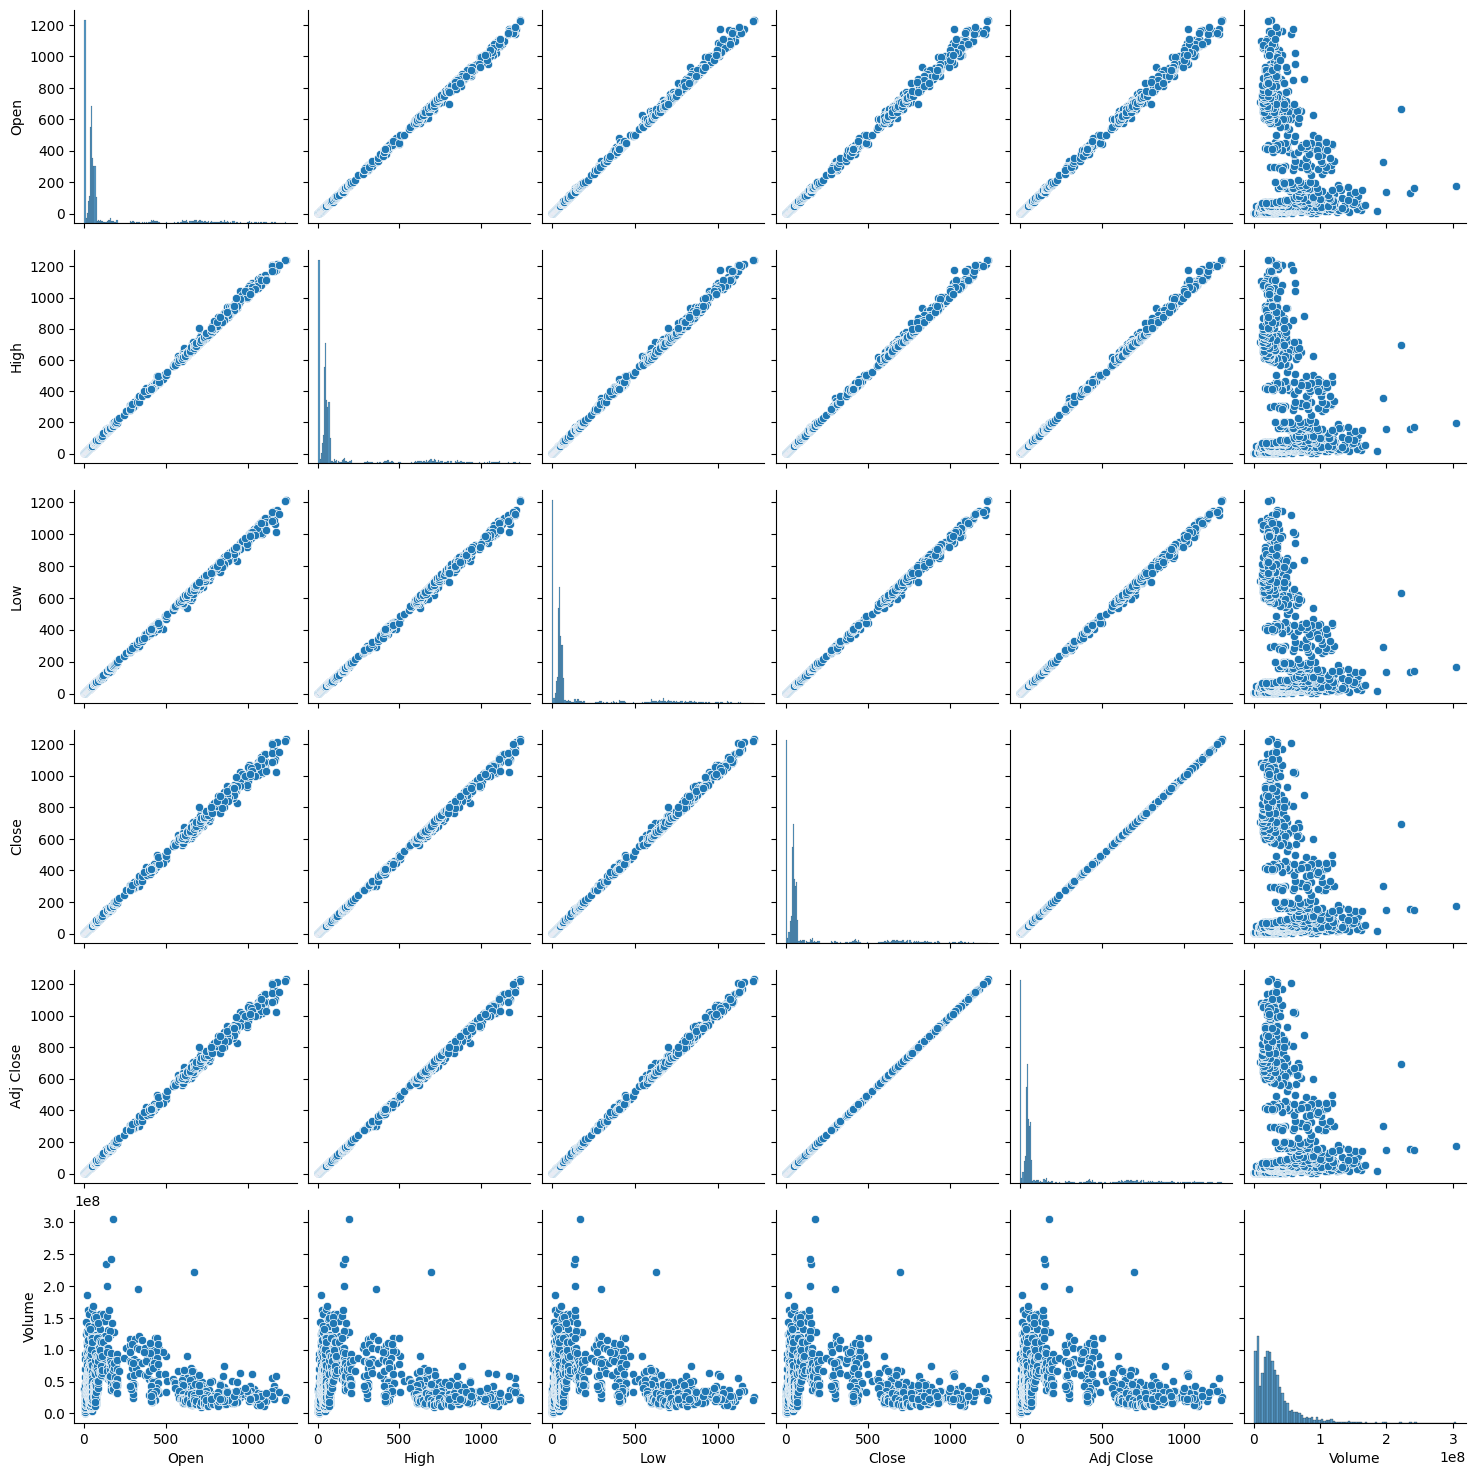

In [17]:
sns.pairplot(df,palette='flare')

In [18]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999726,0.999617,0.999247,0.999247,0.089750
High,0.999726,1.000000,0.999595,0.999666,0.999666,0.093625
Low,0.999617,0.999595,1.000000,0.999670,0.999670,0.085906
Close,0.999247,0.999666,0.999670,1.000000,1.000000,0.090602
Adj Close,0.999247,0.999666,0.999670,1.000000,1.000000,0.090602
Volume,0.089750,0.093625,0.085906,0.090602,0.090602,1.000000


<AxesSubplot: >

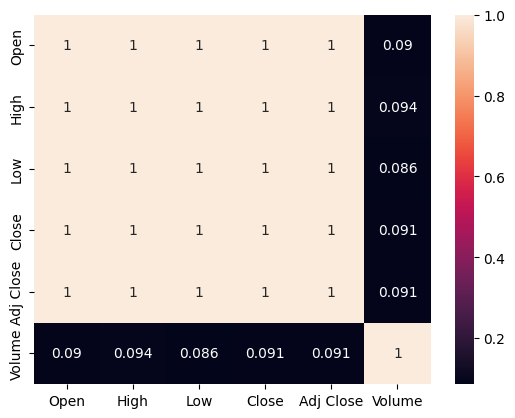

In [20]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot: xlabel='Date'>

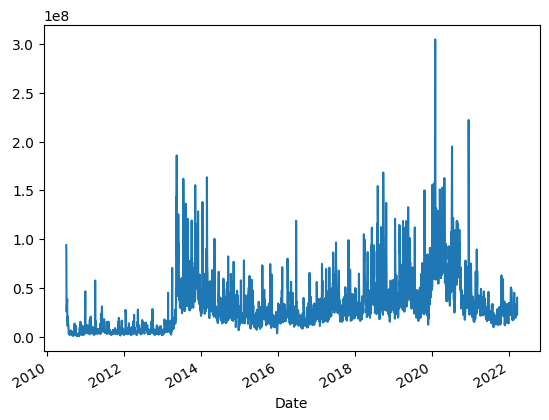

In [23]:
df['Volume'].plot()

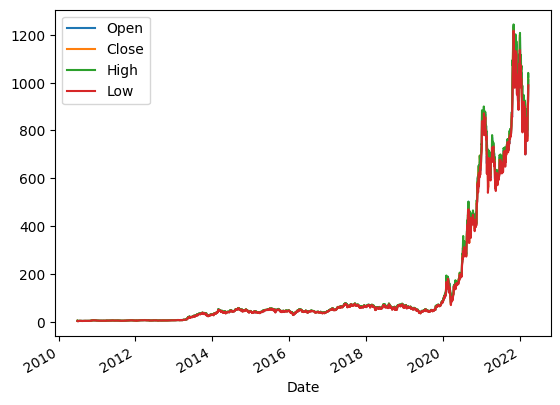

In [26]:
df['Open'].plot()
df['Close'].plot()
df['High'].plot()
df['Low'].plot()
plt.legend()
plt.show()

<AxesSubplot: xlabel='Volume', ylabel='Count'>

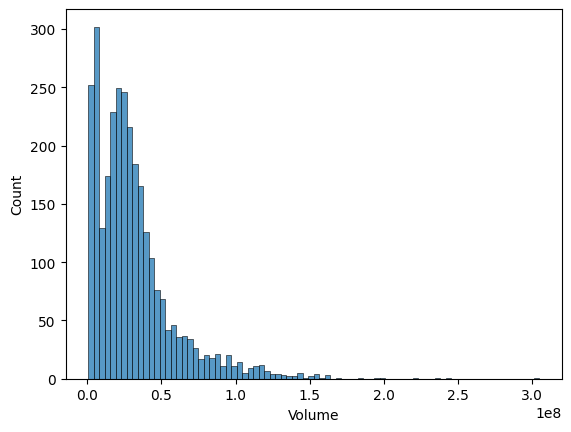

In [27]:
sns.histplot(df['Volume'])

C:\Users\shuai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Volume', ylabel='Density'>

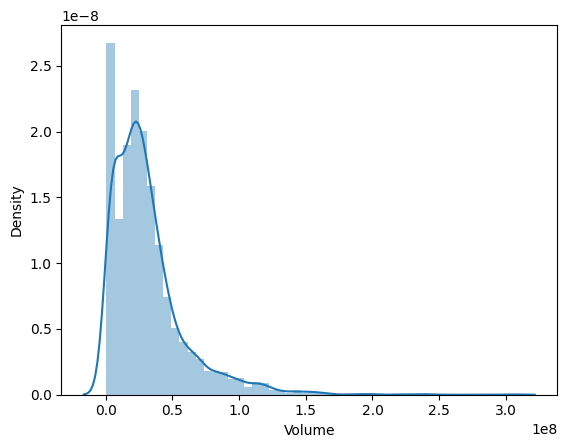

In [29]:
sns.distplot(df['Volume'])

C:\Users\shuai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Open', ylabel='Density'>

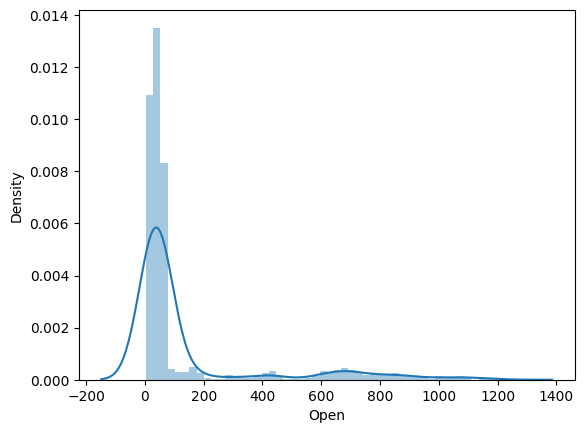

In [31]:
sns.distplot(df['Open'])

In [32]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


<AxesSubplot: xlabel='Date'>

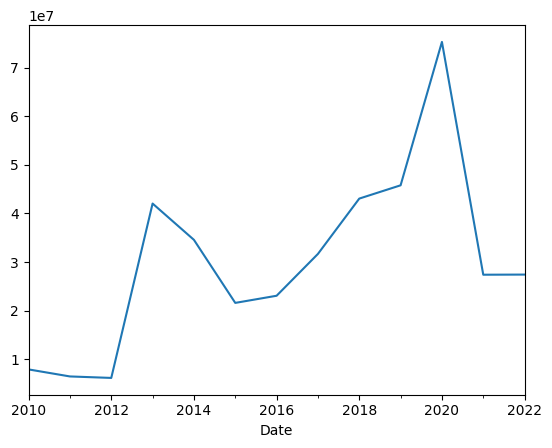

In [54]:
df['Volume'].resample(rule='Y').mean().round().plot()

<AxesSubplot: xlabel='Date'>

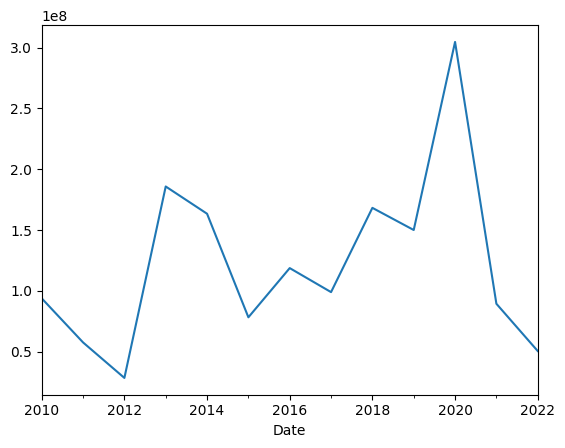

In [53]:
df['Volume'].resample(rule='Y').max().round().plot()

<AxesSubplot: xlabel='Date'>

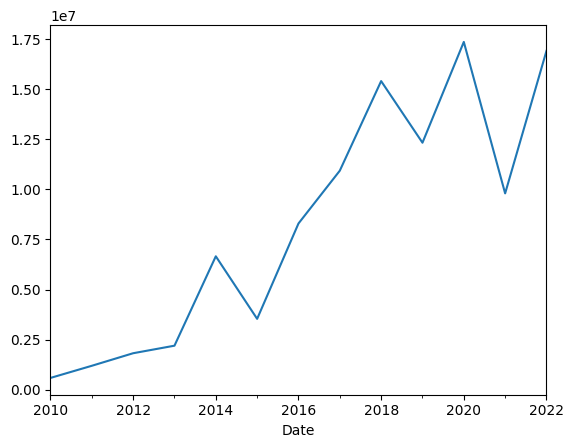

In [52]:
df['Volume'].resample(rule='Y').min().round().plot()

In [67]:
df['sma_200'] = df['Volume'].rolling(window=200,min_periods=1).mean()

In [64]:
df['sma_20'] = df['Volume'].rolling(window=20,min_periods=1).mean()

In [65]:
df['sma_50'] = df['Volume'].rolling(window=50,min_periods=1).mean()

<AxesSubplot: xlabel='Date'>

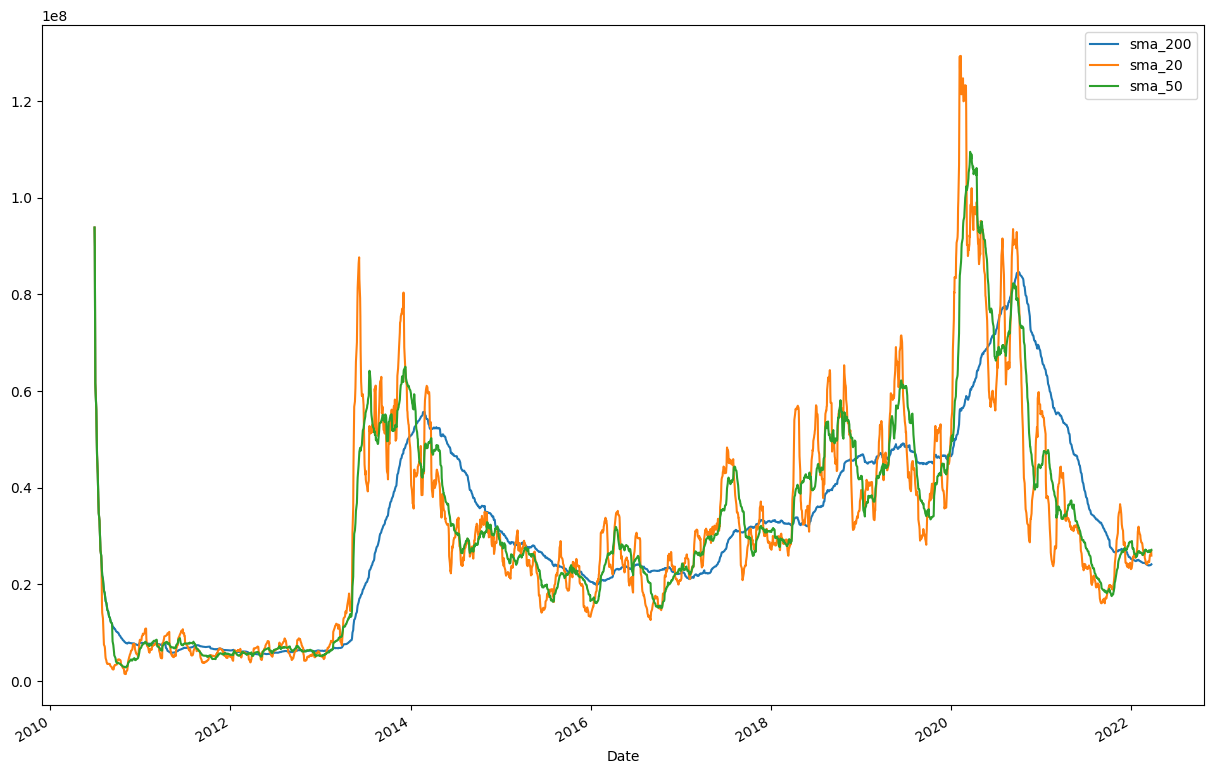

In [73]:
df[['sma_200','sma_20','sma_50']].plot(figsize=(15,10))

In [74]:
df['cma'] = df['Volume'].expanding().mean()

<AxesSubplot: xlabel='Date'>

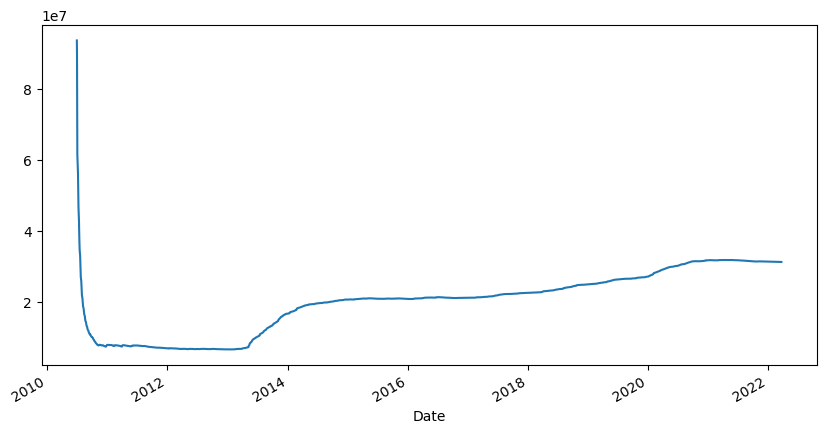

In [78]:
df['cma'].plot(figsize=(10,5))

<AxesSubplot: xlabel='Date'>

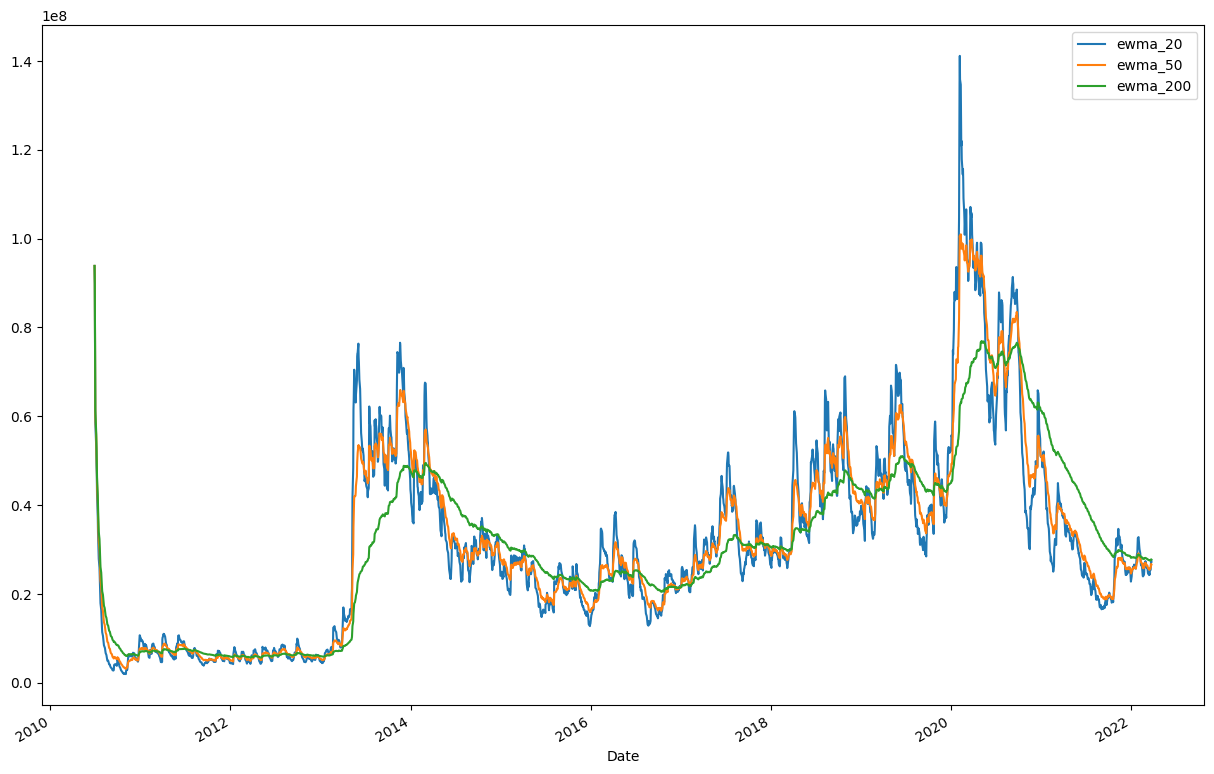

In [77]:
df['ewma_20'] = df['Volume'].ewm(span=20,min_periods=1).mean()
df['ewma_50'] = df['Volume'].ewm(span=50,min_periods=1).mean()
df['ewma_200'] = df['Volume'].ewm(span=200,min_periods=1).mean()
df[['ewma_20','ewma_50','ewma_200']].plot(figsize=(15,10))

<AxesSubplot: xlabel='Date'>

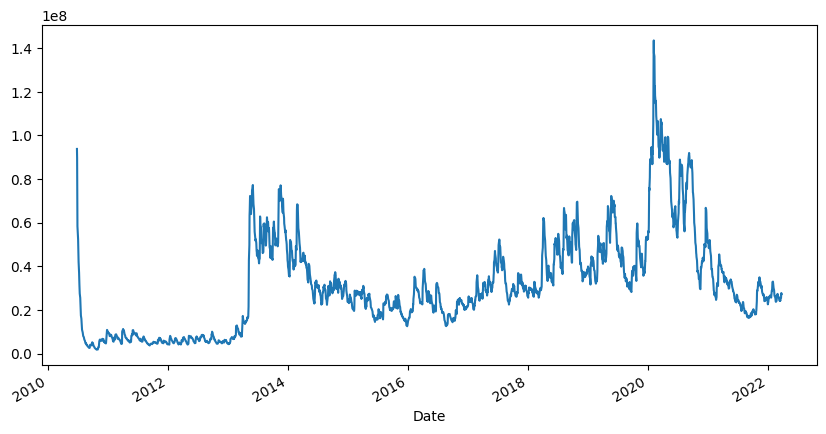

In [84]:
df['ewm'] = df['Volume'].ewm(alpha=0.1,min_periods=1).mean()
df['ewm'].plot(figsize=(10,5))

In [83]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'sma_10',
       'sma_20', 'sma_50', 'sma_200', 'cma', 'ewma_20', 'ewma_50', 'ewma_200',
       'ewm', 'ewm_0.1', 'ewm_0.3', 'ewm_0.5'],
      dtype='object')

In [85]:
df = df[['Open','High','Low','Close','Adj Close','Volume']]

In [86]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [87]:
from statsmodels.tsa.stattools import adfuller

In [88]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics:{}'.format(result[0]))
    print('P-value:{}'.format(result[1]))
    if result[1] <= 0.05:
        print("Reject the Null Hypothesis")
    else:
        print("Accept the Null Hypothesis")

In [89]:
adf_test(df['Volume'])

ADF Statistics:-3.336100635538769
P-value:0.013339902779104828
Reject the Null Hypothesis


In [90]:
df['difference_1'] = df['Volume'] - df['Volume'].shift(1)

C:\Users\shuai\AppData\Local\Temp\ipykernel_15336\2424237649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['difference_1'] = df['Volume'] - df['Volume'].shift(1)


In [93]:
adf_test(df['difference_1'].dropna())

ADF Statistics:-16.47071339604281
P-value:2.2844999289603209e-29
Reject the Null Hypothesis


In [98]:
adfuller(df['Volume'])

(-3.336100635538769,
 0.013339902779104828,
 27,
 2928,
 {'1%': -3.4325853286163874,
  '5%': -2.8625276197775373,
  '10%': -2.5672957374856296},
 105431.53523174852)

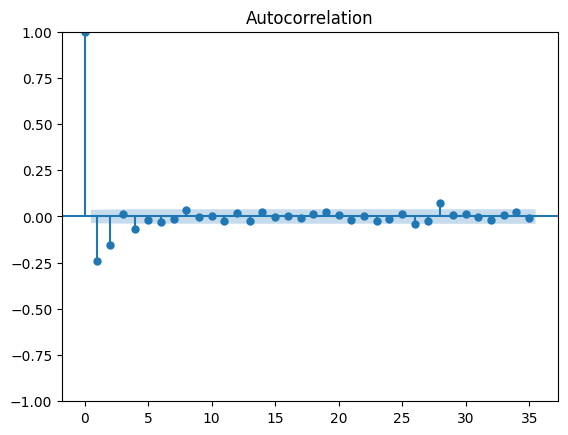

In [99]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(df['difference_1'].dropna())

C:\Users\shuai\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


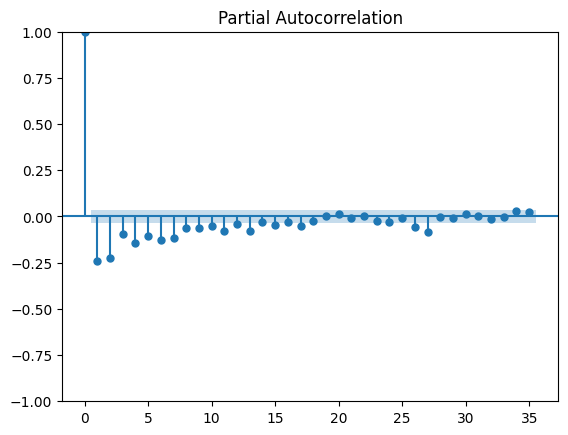

In [100]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_pacf(df['difference_1'].dropna())

In [102]:
from pmdarima import auto_arima
auto_model = auto_arima(df['Volume'],trace=True)
auto_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=106441.105, Time=1.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=107083.441, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=106909.174, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=106764.680, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=107081.446, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=106446.942, Time=0.94 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=106454.105, Time=0.86 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=106433.872, Time=1.44 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=106448.558, Time=1.28 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=106434.350, Time=2.89 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=106432.078, Time=3.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=106432.891, Time=2.22 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=106433.883, Time=1.33 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=106433.738, Time=3.04 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2956
Model:               SARIMAX(1, 1, 4)   Log Likelihood              -53207.433
Date:                Thu, 15 Jun 2023   AIC                         106426.865
Time:                        22:06:05   BIC                         106462.813
Sample:                             0   HQIC                        106439.805
                               - 2956                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4129      0.072      5.758      0.000       0.272       0.553
ma.L1         -0.8338      0.072    -11.571      0.000      -0.975      -0.693
ma.L2         -0.0702      0.034     -2.065      0.039      -0.137      -0.004
ma.L3          0.0655      0.021      3.052      0.002       0.023       0.107
ma.L4         -0.0915      0.019     -4.799      0.000      -0.129      -0.054
sigma2      2.633e+14   8.08e-16   3.26e+29      0.000    2.63e+14    2.63e+14
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             49148.92
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               2.44   Skew:                             2.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.08e+44. Standard errors may be unstable.
"""

In [129]:
import statsmodels.api as sm
sarimax_model = sm.tsa.statespace.SARIMAX(df['Volume'],order=(1,1,4),seasonal_order=(1,1,4,12))
results = sarimax_model.fit()

C:\Users\shuai\AppData\Local\Temp\ipykernel_15336\2272735134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['forecast'] = results.predict(start=2400,end=2955,dynamic=True)


<AxesSubplot: xlabel='Date'>

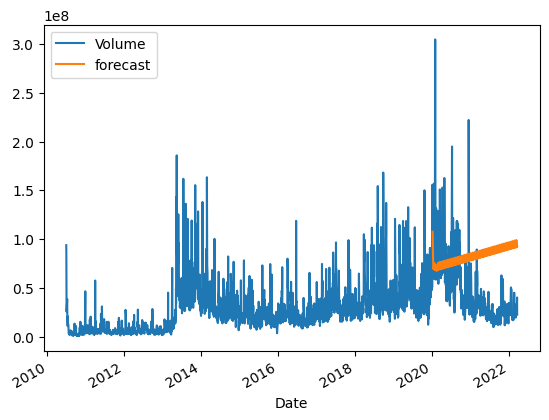

In [130]:
df['forecast'] = results.predict(start=2400,end=2955,dynamic=True)
df[['Volume','forecast']].plot()